# `01` Experiment 1

- Design  LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, you can use dense layer(s) on top (connected to the
output of the LSTM).

  **Additional Requirements**:
  - Try adding a second LSTM layer before the dense layer(s).
  - Change the number of cells to $48, 96, 256$ and report the accuracy curve.

## `+` Import Libraries

In [21]:
from tensorflow import keras
from keras.layers import LSTM, Input, Dense, Dropout, ConvLSTM2D, Flatten
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import Model

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# `+` Seed Value

In [2]:
SEED = 907

## `+` Load & Preprocess MNIST Dataset

**Reminder:** You might need rescaling, and/or other preprocessing methods.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
temp_y = y_train  # for visualization
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


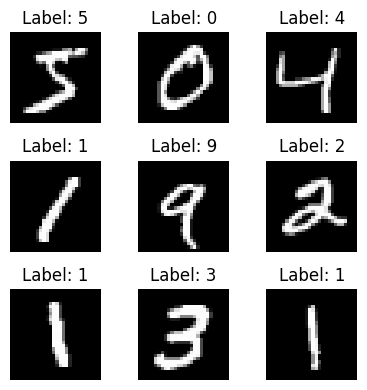

In [7]:
def visualize_mnist(images, labels=None):
    plt.figure(figsize=(4, 4))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        if labels is not None:
            plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_mnist(X_train[:9], temp_y[:9])


## `+` Set Global Parameters

In [8]:
BATCH_SIZE  = 128
EPOCHS      = 100

## `i` Model Design

In [9]:
def lstm_model(lstm_units=[32], dense_units=[], dropout_rate=0.15):
    input_layer = Input(shape=(28, 28))
    x = input_layer

    for i, units in enumerate(lstm_units):
        return_sequences = i < len(lstm_units) - 1
        x = LSTM(units, return_sequences=return_sequences)(x)

    for units in dense_units:
        x = Dense(units, activation='relu')(x)
        x = Dropout(dropout_rate)(x)

    output = Dense(10, activation='softmax')(x)
    return Model(inputs=input_layer, outputs=output)

In [10]:
model_1 = lstm_model(lstm_units=[32], dense_units=[])

model_2 = lstm_model(lstm_units=[48], dense_units=[32])

model_3 = lstm_model(lstm_units=[96], dense_units=[32])

model_4 = lstm_model(lstm_units=[256], dense_units=[32])

model_5 = lstm_model(lstm_units=[64,32], dense_units=[32])

## `ii` Model Compilation & Training

In [11]:
models = {
    "model1": model_1,
    "model2": model_2,
    "model3": model_3,
    "model4": model_4,
    "model5": model_5
}

histories = {}

In [12]:
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights= True)

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[es], verbose=1)
    histories[name] = history


Training model1...
Epoch 1/100
375/375 [==============================] - 6s 7ms/step - loss: 1.0630 - accuracy: 0.6711 - val_loss: 0.4281 - val_accuracy: 0.8775
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.3467 - accuracy: 0.8993 - val_loss: 0.2881 - val_accuracy: 0.9137
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.2417 - accuracy: 0.9302 - val_loss: 0.2241 - val_accuracy: 0.9332
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1979 - accuracy: 0.9429 - val_loss: 0.1869 - val_accuracy: 0.9459
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1672 - accuracy: 0.9517 - val_loss: 0.1453 - val_accuracy: 0.9577
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1456 - accuracy: 0.9572 - val_loss: 0.1373 - val_accuracy: 0.9588
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1336 - accuracy: 0.9594 - val_loss: 0.1261 - 

## `iii` Model Evaluation

In [13]:
evaluation_results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    evaluation_results[name] = {"Test Loss": test_loss, "Test Accuracy": test_acc}
    
for name, result in evaluation_results.items():
    print(f"{name} - Test Loss: {result['Test Loss']}, Test Accuracy: {result['Test Accuracy']}")



Evaluating model1...

Evaluating model2...

Evaluating model3...

Evaluating model4...

Evaluating model5...
model1 - Test Loss: 0.0659559965133667, Test Accuracy: 0.9807000160217285
model2 - Test Loss: 0.069296695291996, Test Accuracy: 0.9815999865531921
model3 - Test Loss: 0.056697338819503784, Test Accuracy: 0.9851999878883362
model4 - Test Loss: 0.04902247339487076, Test Accuracy: 0.9886999726295471
model5 - Test Loss: 0.05778678506612778, Test Accuracy: 0.9847000241279602


## `iv` Result Visualization

In [16]:
# Plot the training and validation accuracy and loss

def plot_model_histories(histories):
    num_models = len(histories)
    fig, axs = plt.subplots(num_models, 2, figsize=(10, 4 * num_models))

    if num_models == 1:
        axs = [axs]  # handle single-model case

    for i, (name, history) in enumerate(histories.items()):
        # Accuracy
        axs[i][0].plot(history.history['accuracy'], label='Train Acc')
        axs[i][0].plot(history.history['val_accuracy'], label='Val Acc')
        axs[i][0].set_title(f'{name} - Accuracy')
        axs[i][0].set_xlabel('Epoch')
        axs[i][0].set_ylabel('Accuracy')
        axs[i][0].legend()

        # Loss
        axs[i][1].plot(history.history['loss'], label='Train Loss')
        axs[i][1].plot(history.history['val_loss'], label='Val Loss')
        axs[i][1].set_title(f'{name} - Loss')
        axs[i][1].set_xlabel('Epoch')
        axs[i][1].set_ylabel('Loss')
        axs[i][1].legend()

    plt.tight_layout()
    plt.show()

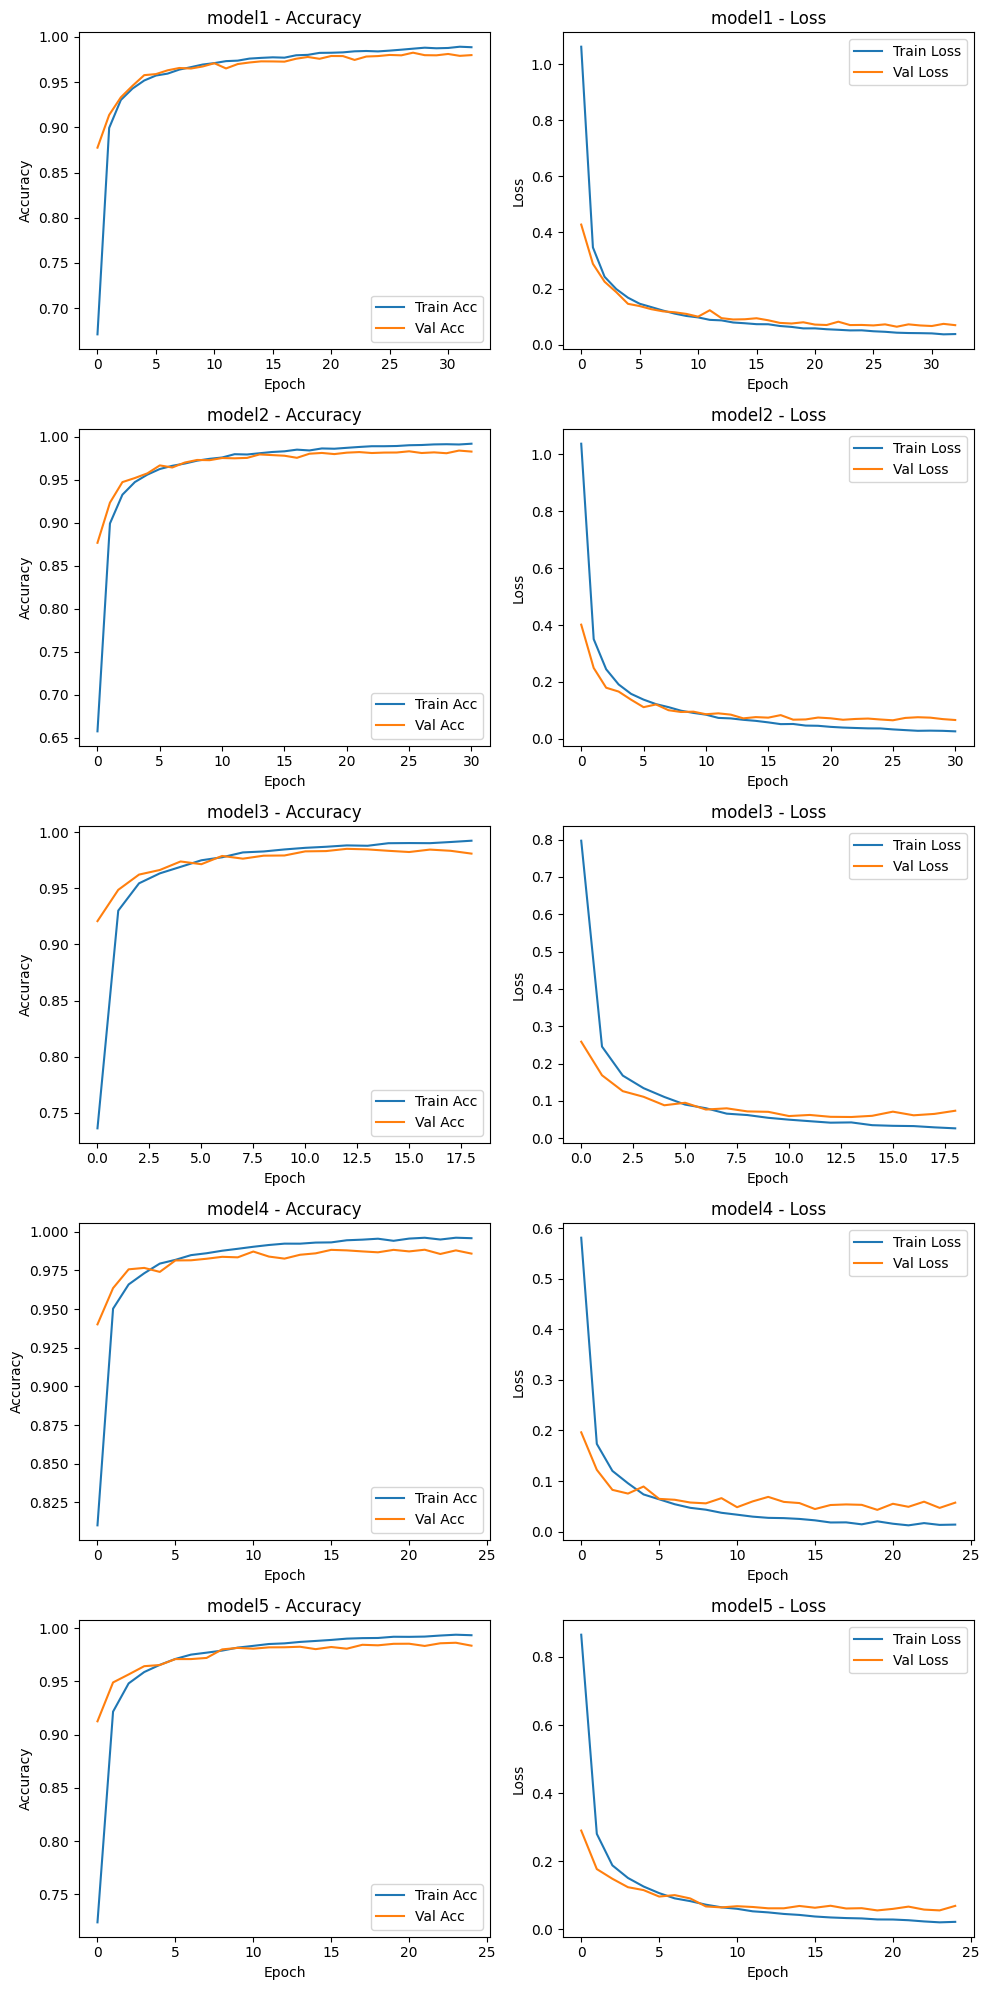

In [17]:
plot_model_histories(histories)

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

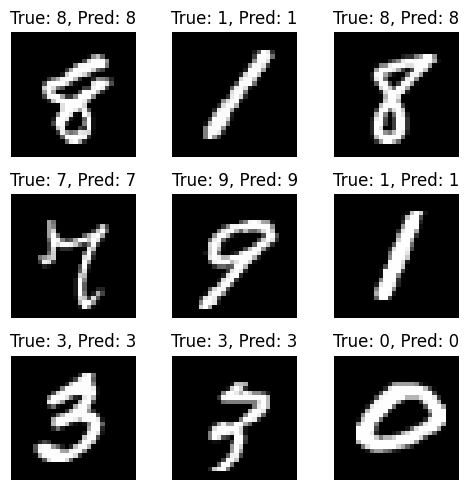

In [19]:
# Plot the Input, True Label, and Predicted Label

y_pred = model_4.predict(X_test, verbose=0) # since it got the best score

random_indices = np.random.choice(len(X_test), 9, replace=False)

plt.figure(figsize=(5, 5))
for i, index in enumerate(random_indices):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[index], cmap='gray')
    plt.axis('off')
    
    true_label = np.argmax(y_test[index])
    predicted_label = np.argmax(y_pred[index])
    
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    
plt.tight_layout()
plt.show()


**Note:** You can add more trials and explore different hyperparameters and design decisions as you want.

------------------------------

# Experiment 02
- Repeat Experiment `01` using `ConvLSTM1D` layer instead of `LSTM`: An LSTM utilizing the power of convolutions. Read more [here](https://paperswithcode.com/method/convlstm) and [here](https://medium.com/neuronio/an-introduction-to-convlstm-55c9025563a7).

**Note:** You might need to reshape the input (Hint: check `keras.layers.Reshape` layer)

------------------------------

## `+` Set Global Parameters

In [ ]:
BATCH_SIZE  = 128
EPOCHS      = 100

In [54]:
X_train = np.expand_dims(X_train, axis=1)
X_train = np.expand_dims(X_train, axis=-1)

X_test = np.expand_dims(X_test, axis=1)
X_test = np.expand_dims(X_test, axis=-1)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 1, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 1, 28, 28, 1)
y_test shape: (10000, 10)


## `i` Model Design

In [55]:
def convlstm_model(lstm_units=[32], kernel_size= (3,3), padding= 'same', dense_units=[], dropout_rate=0.15):
    input_layer = Input(shape=(1, 28, 28, 1))
    x = input_layer

    for i, units in enumerate(lstm_units):
        return_sequences = i < len(lstm_units) - 1
        x = ConvLSTM2D(units, kernel_size, padding= padding, return_sequences=return_sequences)(x)

    x = Flatten()(x)

    for units in dense_units:
        x = Dense(units, activation='relu')(x)
        x = Dropout(dropout_rate)(x)

    output = Dense(10, activation='softmax')(x)
    return Model(inputs=input_layer, outputs=output)


In [56]:
model_1 = convlstm_model(lstm_units=[32], kernel_size= (1,1), padding= 'same', dense_units=[16])

model_2 = convlstm_model(lstm_units=[32], kernel_size= (3,3), padding= 'same',dense_units=[16])

model_3 = convlstm_model(lstm_units=[32], kernel_size= (1,1), padding= 'valid',dense_units=[16])

model_4 = convlstm_model(lstm_units=[32], kernel_size= (3,3), padding= 'valid',dense_units=[16])

## `ii` Model Compilation & Training

In [57]:
models = {
    "model1": model_1,
    "model2": model_2,
    "model3": model_3,
    "model4": model_4,
}

histories = {}

In [58]:
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights= True)

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[es], verbose=1)
    histories[name] = history


Training model1...
Epoch 1/100
375/375 [==============================] - 57s 147ms/step - loss: 0.8428 - accuracy: 0.7418 - val_loss: 0.3376 - val_accuracy: 0.9056
Epoch 2/100
375/375 [==============================] - 11s 29ms/step - loss: 0.4831 - accuracy: 0.8473 - val_loss: 0.2803 - val_accuracy: 0.9211
Epoch 3/100
375/375 [==============================] - 11s 29ms/step - loss: 0.4304 - accuracy: 0.8629 - val_loss: 0.2604 - val_accuracy: 0.9252
Epoch 4/100
375/375 [==============================] - 11s 28ms/step - loss: 0.4062 - accuracy: 0.8700 - val_loss: 0.2439 - val_accuracy: 0.9333
Epoch 5/100
375/375 [==============================] - 11s 28ms/step - loss: 0.3878 - accuracy: 0.8761 - val_loss: 0.2397 - val_accuracy: 0.9312
Epoch 6/100
375/375 [==============================] - 11s 29ms/step - loss: 0.3808 - accuracy: 0.8767 - val_loss: 0.2311 - val_accuracy: 0.9343
Epoch 7/100
375/375 [==============================] - 11s 29ms/step - loss: 0.3694 - accuracy: 0.8824 - val_

## `iii` Model Evaluation

In [59]:
evaluation_results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    evaluation_results[name] = {"Test Loss": test_loss, "Test Accuracy": test_acc}
    
for name, result in evaluation_results.items():
    print(f"{name} - Test Loss: {result['Test Loss']:.4f}, Test Accuracy: {result['Test Accuracy']:.4f}")



Evaluating model1...

Evaluating model2...

Evaluating model3...

Evaluating model4...
model1 - Test Loss: 0.2163, Test Accuracy: 0.9382
model2 - Test Loss: 0.0746, Test Accuracy: 0.9783
model3 - Test Loss: 0.1776, Test Accuracy: 0.9488
model4 - Test Loss: 0.0746, Test Accuracy: 0.9770


## `iv` Result Visualization

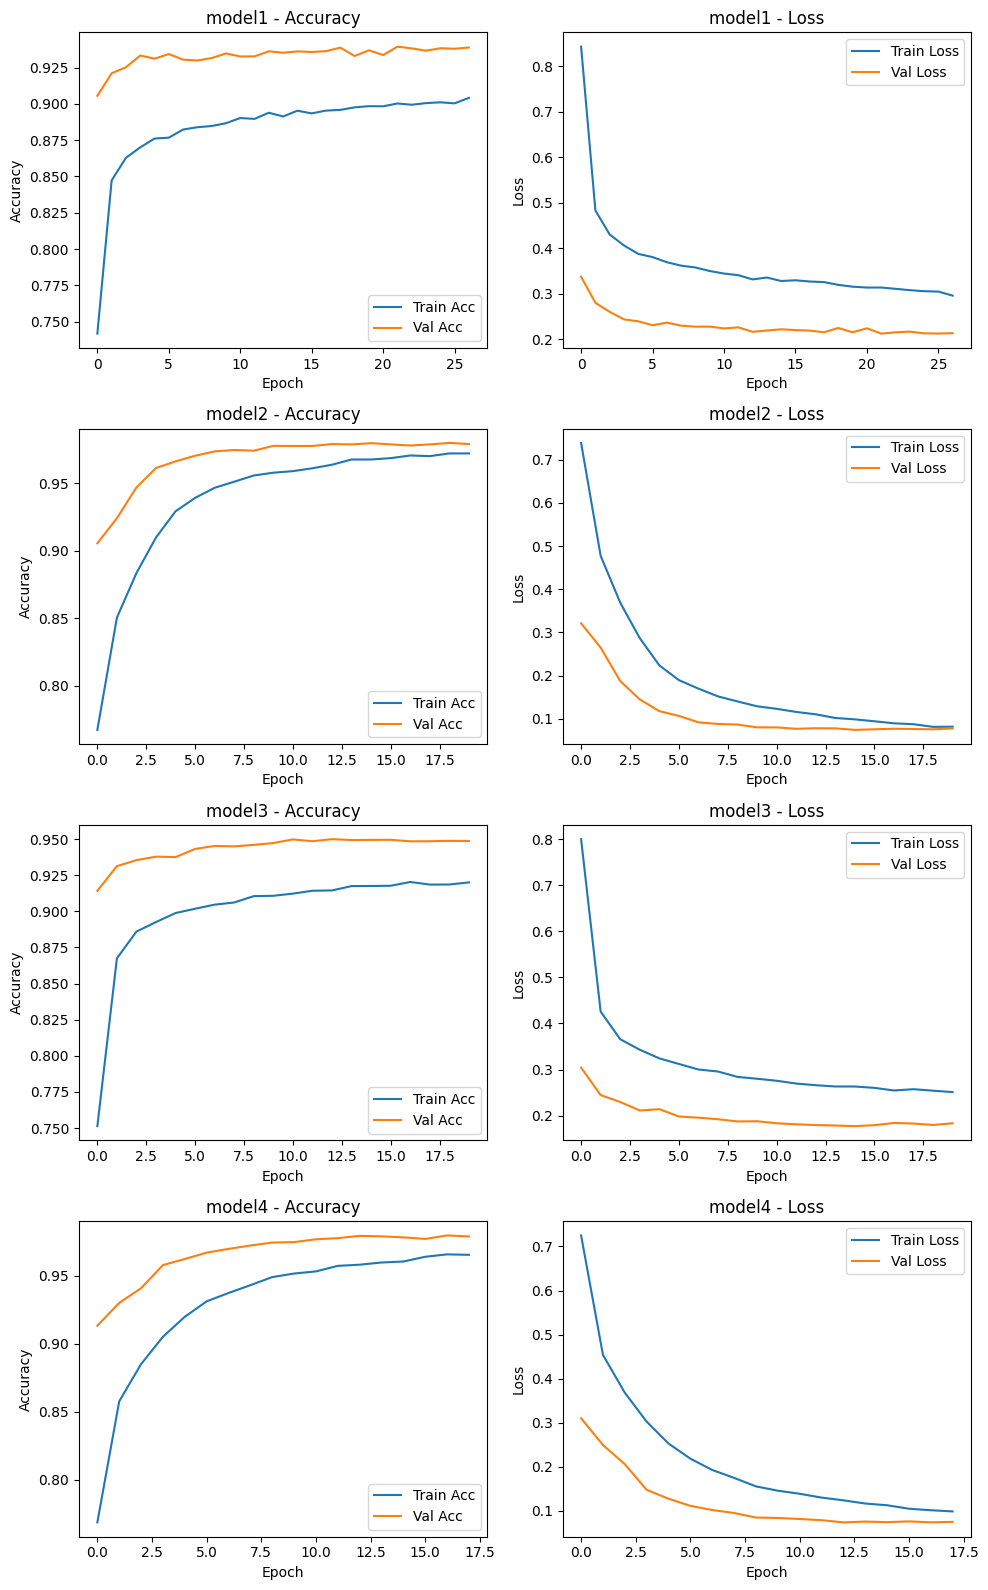

In [61]:
plot_model_histories(histories)

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

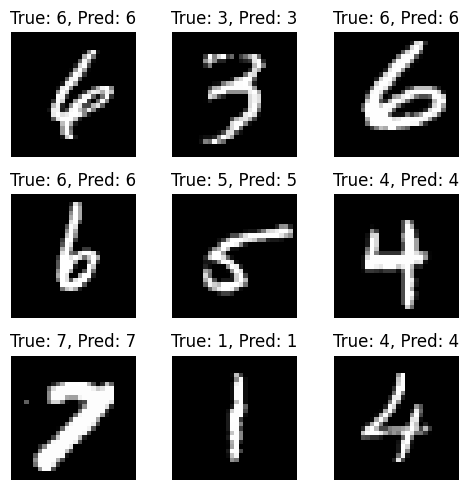

In [ ]:
# Plot the Input, True Label, and Predicted Label

y_pred = model_2.predict(X_test, verbose=0) # since it got the best score

random_indices = np.random.choice(len(X_test), 9, replace=False)

plt.figure(figsize=(5, 5))
for i, index in enumerate(random_indices):
    plt.subplot(3, 3, i+1)
    
    img = X_test[index, 0, :, :, 0]
    
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    true_label = np.argmax(y_test[index])
    predicted_label = np.argmax(y_pred[index])
    
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    
plt.tight_layout()
plt.show()

## `vi` Insights

- (3 , 3) filter has much better performance than (1 , 1)
- 'same' padding took more time to train than 'valid padding
- Different paddings didn't affect model evalutation that much (1% max)
- kernel size (3 , 3) and 'same' padding got the best accuracy